In [3]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
#from tensorflow.keras.datasets import mnist
import glob as gb
import cv2

In [5]:
img_path=gb.glob('Hoda 0-9\*.bmp')
x=[]
y=[]
for i in range(0, len(img_path)):
    p=img_path[i]
    #print(p)
    img=cv2.imread(p,0)    
    img=cv2.resize(img,dsize=(28,28))
    indx=p.find('_')
    Label=int(p[indx-1])
    x.append(img)
    y.append(Label)
from sklearn.model_selection import train_test_split
print('type array before spliting: ',type(x))
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=1)
print('type array After spliting: ',type(x_train))

x_train0=np.array(x_train)
x_test0=np.array(x_test)
y_train0=np.array(y_train)
y_test0=np.array(y_test)
print('type array After np.array: ',type(x_train0),x_train0.shape,x_test0.shape)


type array before spliting:  <class 'list'>
type array After spliting:  <class 'list'>
type array After np.array:  <class 'numpy.ndarray'> (1358, 28, 28) (340, 28, 28)


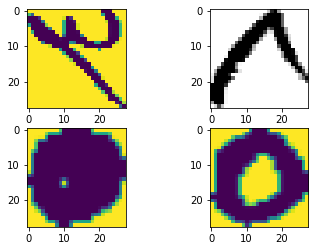

In [6]:
fig , ax = plt.subplots(2,2)
ax[0,0].imshow(x_train0[0])

ax[0,1].imshow(x_train0[500],cmap=plt.get_cmap('gray'))

ax[1,0].imshow(x_train0[600])

ax[1,1].imshow(x_train0[700])

In [7]:
print('Befor reshape: ' ,x_train0.shape)
print('Befor reshape: ' ,x_test0.shape)
print('=============__===============')
print('             ||               ')
print('             \/               ') 
#reshape to be [samples][width][hight][channels]
x_train = x_train0.reshape((x_train0.shape[0], 28, 28, 1))
x_test  = x_test0.reshape((x_test0.shape[0],  28, 28, 1))
print('After reshape: ' ,x_train.shape)
print('After reshape: ' ,x_test.shape)
#normalize
x_train=x_train/255
x_test= x_test/255
#one hot encode outputs
print('----------------------------------------------------------------------------')
print(y_train0.shape)
y_train = to_categorical(y_train0)
y_test  = to_categorical(y_test0)
print(y_test[0:3])
num_classes=y_test.shape[1]
print('num_classes After to_categorical',num_classes)

Befor reshape:  (1358, 28, 28)
Befor reshape:  (340, 28, 28)
=============__===============
             ||               
             \/               
After reshape:  (1358, 28, 28, 1)
After reshape:  (340, 28, 28, 1)
----------------------------------------------------------------------------
(1358,)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
num_classes After to_categorical 10


In [8]:
# network parameters
input_shape = (28, 28, 1)
batch_size = 64
kernel_size = 5
pool_size = 2
filters = 32
dropout = 0.2

In [6]:
model = Sequential()
#Layer 1
model.add(  Conv2D(   filters=filters, kernel_size=kernel_size,    activation='relu', input_shape=input_shape   ) )
model.add(MaxPooling2D(pool_size))

model.add(  Conv2D(   filters=filters, kernel_size=kernel_size,    activation='relu'))
model.add(MaxPooling2D(pool_size))

model.add(  Flatten()    )
    
model.add(Dense(90,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 90)                4

In [2]:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 conv2d (Conv2D)              (None, 24, 24, 32)        832       
 #((5*5)+1) * 32 =832                                                           
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0       )                                                               
                                                                 
 conv2d_1 (Conv2D)            (None, 8, 8, 32)          25632     
 #(832-(32-1)) * 32 =25632                                                             
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         2D)                                                             
                                                                 
 flatten (Flatten)            (None, 512)               0         
                                                                 
 dense (Dense)                (None, 90)                46170     
     #(512 +1 )   * 90 = 46170                                                          
 dense_1 (Dense)              (None, 10)                910       
     #(90 + 1 ) * 10 = 910
=================================================================
Total params: 73,544
Trainable params: 73,544
Non-trainable params: 0
_________________________________________________________________

IndentationError: unexpected indent (2306237177.py, line 3)

In [9]:
#output shape :  (input_shape- kernel_size)+1
(28-7)+1

22

In [10]:
#conv2d_28 (Conv2D)   param 1600


((7*7)+1)*32

1600

In [11]:
1600*(28)

44800

In [12]:
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

Epoch 1/10
22/22 [==============================] - 1s 23ms/step - loss: 2.0082 - accuracy: 0.3814
Epoch 2/10
22/22 [==============================] - 0s 21ms/step - loss: 1.0994 - accuracy: 0.6510
Epoch 3/10
22/22 [==============================] - 0s 21ms/step - loss: 0.6417 - accuracy: 0.8041
Epoch 4/10
22/22 [==============================] - 0s 22ms/step - loss: 0.4746 - accuracy: 0.8402
Epoch 5/10
22/22 [==============================] - 0s 21ms/step - loss: 0.3583 - accuracy: 0.8829
Epoch 6/10
22/22 [==============================] - 0s 21ms/step - loss: 0.2801 - accuracy: 0.9116
Epoch 7/10
22/22 [==============================] - 0s 21ms/step - loss: 0.2395 - accuracy: 0.9234
Epoch 8/10
22/22 [==============================] - 0s 21ms/step - loss: 0.2123 - accuracy: 0.9286
Epoch 9/10
22/22 [==============================] - 0s 20ms/step - loss: 0.2090 - accuracy: 0.9293
Epoch 10/10
22/22 [==============================] - 0s 20ms/step - loss: 0.1502 - accuracy: 0.9514


In [13]:
loss1, acc1 = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\n Test accuracy: %.1f%%" % (100.0 * acc1))

loss2, acc2 = model.evaluate(x_train, y_train, batch_size=batch_size)
print("\n Train accuracy: %.1f%%" % (100.0 * acc2))

6/6 [==============================] - 0s 5ms/step - loss: 0.1880 - accuracy: 0.9559

 Test accuracy: 95.6%
22/22 [==============================] - 0s 4ms/step - loss: 0.1202 - accuracy: 0.9654

 Train accuracy: 96.5%


In [14]:
((7*7)+1)

50

In [15]:
x_test.shape

(340, 28, 28, 1)

In [16]:
x_test[0,:,:,:]

array([[[1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [0.51764706],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.90980392],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ]],

       [[1.        ],
        [1.        ],
        [1.        ],
        [0.62352941],
        [0.        ],
        [0.        ],
        [0.69803922],
        [0.19607843],
        [0.90980392],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        

In [17]:
x_test[:,:,:,:].shape

(340, 28, 28, 1)

In [18]:
x_test[0]

array([[[1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [0.51764706],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.90980392],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ]],

       [[1.        ],
        [1.        ],
        [1.        ],
        [0.62352941],
        [0.        ],
        [0.        ],
        [0.69803922],
        [0.19607843],
        [0.90980392],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        

In [19]:
model.predict(x_test[10:11,:,:,:])[0]

1/1 [==============================] - 0s 69ms/step


array([3.1212959e-03, 1.0070527e-04, 1.2407371e-05, 1.5208746e-05,
       2.6754735e-04, 9.9030685e-01, 6.1173528e-03, 3.5294684e-05,
       1.9137611e-05, 4.2881629e-06], dtype=float32)

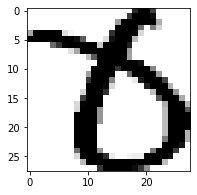

In [20]:
plt.figure(figsize=(5,3))
plt.imshow(x_test[10],cmap=plt.get_cmap('gray'))
plt.show()

In [21]:
x_test.shape

(340, 28, 28, 1)

In [22]:
type(model.predict(x_test))

11/11 [==============================] - 0s 3ms/step


numpy.ndarray

In [23]:
model.predict(x_test).shape

11/11 [==============================] - 0s 3ms/step


(340, 10)

In [24]:
[np.argmax(x) for x in model.predict(x_test)]

11/11 [==============================] - 0s 3ms/step


[4,
 8,
 7,
 2,
 7,
 8,
 1,
 7,
 3,
 5,
 5,
 9,
 0,
 5,
 5,
 9,
 7,
 1,
 1,
 5,
 5,
 9,
 7,
 8,
 2,
 8,
 8,
 7,
 2,
 8,
 8,
 3,
 8,
 8,
 2,
 3,
 8,
 1,
 2,
 3,
 6,
 0,
 0,
 5,
 0,
 7,
 9,
 6,
 0,
 3,
 7,
 9,
 9,
 8,
 6,
 5,
 5,
 4,
 9,
 4,
 0,
 2,
 9,
 3,
 4,
 8,
 6,
 3,
 9,
 5,
 9,
 5,
 0,
 3,
 2,
 0,
 4,
 2,
 5,
 0,
 5,
 7,
 5,
 7,
 7,
 3,
 8,
 2,
 6,
 6,
 3,
 1,
 6,
 6,
 5,
 3,
 1,
 8,
 6,
 5,
 7,
 2,
 4,
 7,
 3,
 3,
 0,
 4,
 0,
 9,
 5,
 0,
 2,
 4,
 2,
 2,
 1,
 7,
 4,
 1,
 3,
 6,
 2,
 0,
 8,
 9,
 6,
 4,
 1,
 2,
 8,
 6,
 2,
 2,
 1,
 3,
 4,
 4,
 4,
 5,
 2,
 1,
 0,
 4,
 9,
 0,
 5,
 5,
 9,
 1,
 5,
 2,
 8,
 4,
 0,
 0,
 3,
 4,
 4,
 1,
 3,
 0,
 0,
 7,
 8,
 5,
 8,
 9,
 3,
 7,
 2,
 1,
 1,
 6,
 8,
 2,
 9,
 4,
 6,
 7,
 0,
 9,
 6,
 0,
 2,
 7,
 9,
 6,
 7,
 5,
 5,
 9,
 8,
 3,
 3,
 1,
 0,
 7,
 5,
 0,
 3,
 4,
 0,
 1,
 7,
 7,
 1,
 0,
 3,
 4,
 4,
 8,
 9,
 8,
 2,
 2,
 6,
 5,
 9,
 7,
 6,
 6,
 4,
 8,
 3,
 2,
 8,
 2,
 8,
 1,
 4,
 1,
 6,
 7,
 5,
 7,
 6,
 3,
 0,
 9,
 9,
 2,
 7,
 9,
 4,
 6,
 6,
 3,
 0,
 4,


11/11 [==============================] - 0s 3ms/step


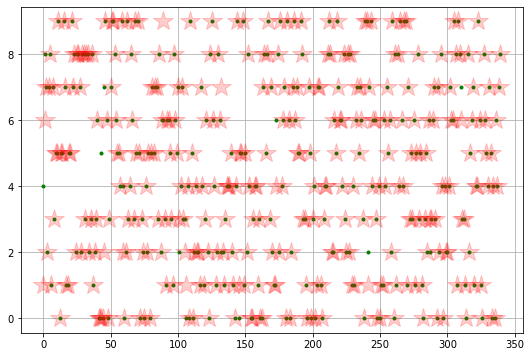

In [25]:
plt.figure(figsize=(9,6))
plt.plot([np.argmax(x) for x in model.predict(x_test)],ls='',marker='.',c='green')
plt.plot(y_test0,ls='',marker='*',markersize=20,c='red',alpha=0.2)

plt.grid()
plt.show()

In [26]:
model.layers[0].get_weights()[0].shape

(5, 5, 1, 32)

In [27]:
model.layers[0].get_weights()[0]

array([[[[-3.31816915e-03,  9.46447179e-02,  2.97394395e-03,
          -6.38662353e-02, -1.48689359e-01,  5.42776696e-02,
           1.42987192e-01,  5.86840846e-02,  5.20596914e-02,
           1.16483390e-01,  6.07968532e-02, -4.48602699e-02,
           6.02729507e-02,  3.94050926e-02, -5.23936339e-02,
           9.89811346e-02,  3.41260210e-02,  1.69863880e-01,
          -1.44239813e-02,  2.82398909e-02, -3.76573540e-02,
           1.65823866e-02,  3.61183807e-02,  2.69109439e-02,
           1.10223264e-01,  1.13412803e-02, -9.89836603e-02,
           2.09000222e-02,  9.79673043e-02, -4.70926566e-03,
          -1.81778744e-02, -5.46738133e-02]],

        [[ 1.07039392e-01,  1.96431018e-02, -3.14146429e-02,
          -2.49285717e-02, -5.19642606e-02,  3.68797258e-02,
           6.92620501e-02, -1.50936870e-02, -5.96282678e-03,
           7.50878304e-02, -5.25280498e-02,  2.78445501e-02,
           7.06597120e-02, -3.78868356e-02, -5.40812947e-02,
           9.65346023e-02, -9.83364647

In [28]:
model.layers[0].get_weights()[1]

array([ 0.00875105,  0.06455737, -0.03868599,  0.01762075,  0.02814043,
       -0.00214417,  0.03207488,  0.04179094,  0.03905944, -0.03551411,
       -0.02940575,  0.05502279, -0.03717837,  0.01106668,  0.06361434,
       -0.00180364,  0.06806599,  0.05788366,  0.02039603,  0.03016046,
        0.08887183, -0.01053838,  0.08660825,  0.0367823 , -0.01686807,
        0.02662215,  0.01375958,  0.04279049,  0.03294795, -0.02446171,
       -0.03991095,  0.00241907], dtype=float32)

In [29]:
model.layers[0].variables

[<tf.Variable 'conv2d/kernel:0' shape=(5, 5, 1, 32) dtype=float32, numpy=
 array([[[[-3.31816915e-03,  9.46447179e-02,  2.97394395e-03,
           -6.38662353e-02, -1.48689359e-01,  5.42776696e-02,
            1.42987192e-01,  5.86840846e-02,  5.20596914e-02,
            1.16483390e-01,  6.07968532e-02, -4.48602699e-02,
            6.02729507e-02,  3.94050926e-02, -5.23936339e-02,
            9.89811346e-02,  3.41260210e-02,  1.69863880e-01,
           -1.44239813e-02,  2.82398909e-02, -3.76573540e-02,
            1.65823866e-02,  3.61183807e-02,  2.69109439e-02,
            1.10223264e-01,  1.13412803e-02, -9.89836603e-02,
            2.09000222e-02,  9.79673043e-02, -4.70926566e-03,
           -1.81778744e-02, -5.46738133e-02]],
 
         [[ 1.07039392e-01,  1.96431018e-02, -3.14146429e-02,
           -2.49285717e-02, -5.19642606e-02,  3.68797258e-02,
            6.92620501e-02, -1.50936870e-02, -5.96282678e-03,
            7.50878304e-02, -5.25280498e-02,  2.78445501e-02,
         

In [30]:
model.layers[0].filters

32

In [31]:
model.layers[0].kernel

<tf.Variable 'conv2d/kernel:0' shape=(5, 5, 1, 32) dtype=float32, numpy=
array([[[[-3.31816915e-03,  9.46447179e-02,  2.97394395e-03,
          -6.38662353e-02, -1.48689359e-01,  5.42776696e-02,
           1.42987192e-01,  5.86840846e-02,  5.20596914e-02,
           1.16483390e-01,  6.07968532e-02, -4.48602699e-02,
           6.02729507e-02,  3.94050926e-02, -5.23936339e-02,
           9.89811346e-02,  3.41260210e-02,  1.69863880e-01,
          -1.44239813e-02,  2.82398909e-02, -3.76573540e-02,
           1.65823866e-02,  3.61183807e-02,  2.69109439e-02,
           1.10223264e-01,  1.13412803e-02, -9.89836603e-02,
           2.09000222e-02,  9.79673043e-02, -4.70926566e-03,
          -1.81778744e-02, -5.46738133e-02]],

        [[ 1.07039392e-01,  1.96431018e-02, -3.14146429e-02,
          -2.49285717e-02, -5.19642606e-02,  3.68797258e-02,
           6.92620501e-02, -1.50936870e-02, -5.96282678e-03,
           7.50878304e-02, -5.25280498e-02,  2.78445501e-02,
           7.06597120e-02,